In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from textblob import TextBlob
import nltk
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data= pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
data.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [4]:
#Finding Uniques in each Columns of Training set

for i in data.columns:
    print('Total unique in',i,'=',data[i].nunique())

Total unique in Unnamed: 0 = 23486
Total unique in Clothing ID = 1206
Total unique in Age = 77
Total unique in Title = 13993
Total unique in Review Text = 22634
Total unique in Rating = 5
Total unique in Recommended IND = 2
Total unique in Positive Feedback Count = 82
Total unique in Division Name = 3
Total unique in Department Name = 6
Total unique in Class Name = 20


In [5]:
data=data.drop(columns='Unnamed: 0')

In [6]:
data=data.dropna(subset=['Review Text'])
data.columns=data.columns.str.replace(" ","_")

In [7]:
# define a function to get rid of stopwords present in the messages
def message_text_process(mess):
    # Check characters to see if there are punctuations
    no_punctuation = [char for char in mess if char not in string.punctuation]
    # now form the sentence.
    no_punctuation = ''.join(no_punctuation)
    # Now eliminate any stopwords
    return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [8]:
# define a function to get rid of Punctuations present in the messages
def process(message):
    # Check characters to see if there are punctuations
    text = [char for char in message if char not in string.punctuation]
    # now form the sentence.
    text = ''.join(text)
    # Now eliminate any Punctuations
    return text

In [9]:
#applying Process function to TEXT
data['Review_Text']=data['Review_Text'].apply(process)

In [10]:
data['Review_Length']=data.Review_Text.apply(len)

In [11]:
data['word_count']=data.Review_Text.apply(lambda x: len(str(x).split(" ")))

In [12]:
data['polarity']=data.Review_Text.map(lambda text: TextBlob(text).sentiment.polarity)

In [13]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = data.loc[data.polarity == 1, ['Review_Text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

The print is awesome 
Fits perfect
This is a wonderful style
I bought this dress as a surprise for my daughter she was very happy with it
Perfect for lunch with the girls pta or saturdays with the family this skirt is a perfect addition to your fall wardrobe


In [14]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = data.loc[data.polarity == 0, ['Review_Text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

Flattering poncho pair well with leggings or skinny jeans and booties
These shorts are divine the fabric is sturdy and there is a weave of sparkle that i did not perceive from the picture
Too pricey for the quality of this imported product
I got fooled by this dresss description its 100 polyester and not wool as it claims to be looks cheapreturned it
Had to take a needle and pull threads to the back so not visible and i see this as an ongoing problem


In [15]:
print('2 reviews with the most negative polarity: \n')
cl = data.loc[data.polarity == -0.97500000000000009, ['Review_Text']].sample(2).values
for c in cl:
    print(c[0])

2 reviews with the most negative polarity: 

Received this product with a gaping hole in it very disappointed in the quality and the quality control at the warehouse
Cut out design no seems or hems
 very disappointed in retailer


Text(0, 0.5, 'Count')

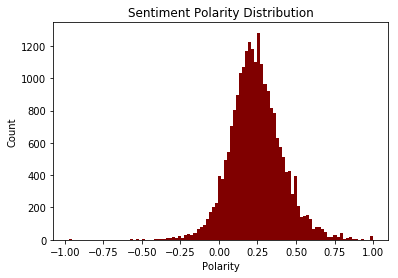

In [16]:
data['polarity'].plot(kind='hist',bins=100,title='Sentiment Polarity Distribution',color='maroon')
plt.xlabel('Polarity')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

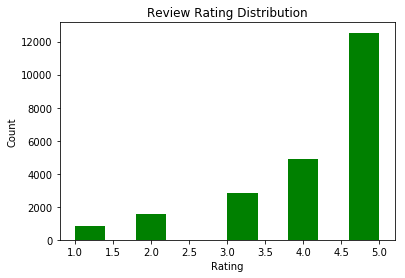

In [17]:
data['Rating'].plot(kind='hist',title='Review Rating Distribution',color='green')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

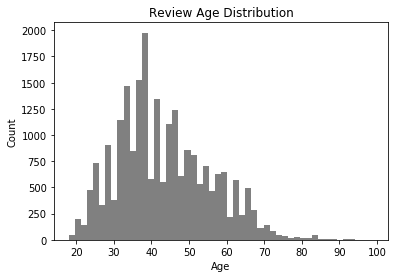

In [18]:
data['Age'].plot(kind='hist',bins=50,title='Review Age Distribution',color='grey')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

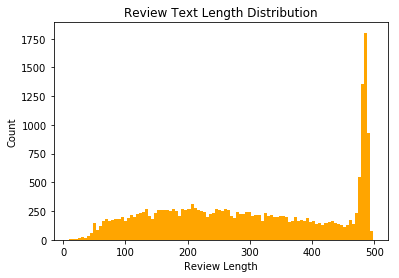

In [19]:
data['Review_Length'].plot(kind='hist',bins=100,title='Review Text Length Distribution',color='orange')
plt.xlabel('Review Length')
plt.ylabel('Count')

Text(0.5, 0, 'Bar chart of Division Name')

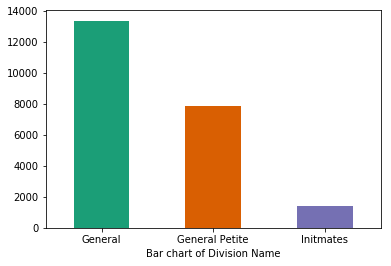

In [20]:
data.groupby('Division_Name')['Clothing_ID'].count().plot(kind='bar',color=plt.cm.Dark2.colors)
plt.xticks(rotation=0)
plt.xlabel("Bar chart of Division Name")


Text(0.5, 0, 'Bar chart of Department Name')

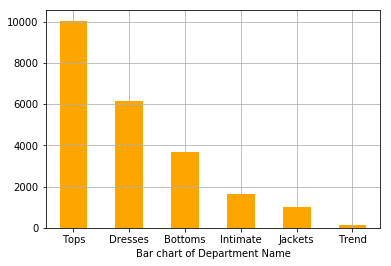

In [21]:
data.groupby('Department_Name')['Clothing_ID'].count().sort_values(ascending=False).plot(kind='bar',grid=True,color='orange')
plt.xticks(rotation=0)
plt.xlabel("Bar chart of Department Name")

Text(0, 0.5, 'count')

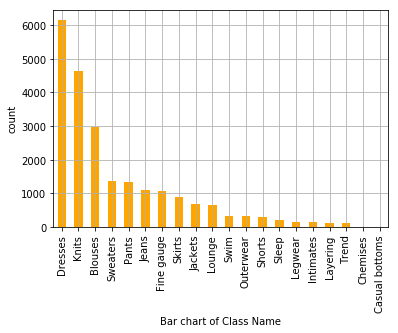

In [22]:
data.groupby('Class_Name')['Clothing_ID'].count().sort_values(ascending=False).plot(kind='bar',grid=True,color='orange')
plt.xticks(rotation=90)
plt.xlabel("Bar chart of Class Name")
plt.ylabel("count")

**Now we come to “Review Text” feature, before explore this feature, we need to extract N-Gram features. N-grams are used to describe the number of words used as observation points, e.g., unigram means singly-worded, bigram means 2-worded phrase, and trigram means 3-worded phrase. In order to do this, we use scikit-learn’s CountVectorizer function.First, it would be interesting to compare unigrams before and after removing stop words.**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer()

In [80]:
def top_words(text):
    vector=CountVectorizer()
    bag_of_words=vector.fit_transform(data['Review_Text'])
    sum_of_words= bag_of_words.sum(axis=0)
    frequency=[(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    frequency=sorted(frequency, key=lambda x: x[1], reverse=True)
    return frequency

words=top_words(data["Review_Text"])

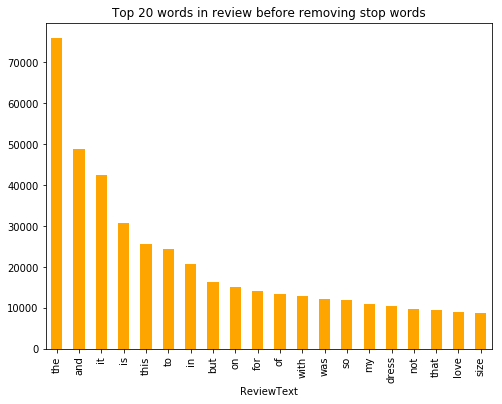

In [81]:
df= pd.DataFrame(words, columns = ['ReviewText' , 'count'])
df2=df.head(20)
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='orange', title='Top 20 words in review before removing stop words',figsize=(8,6))

In [82]:
def top_words_wo_stop(text):
    vector=CountVectorizer(stop_words='english')
    bag_of_words=vector.fit_transform(data['Review_Text'])
    sum_of_words= bag_of_words.sum(axis=0)
    frequency=[(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    frequency=sorted(frequency, key=lambda x: x[1], reverse=True)
    return frequency

words=top_words_wo_stop(data["Review_Text"])

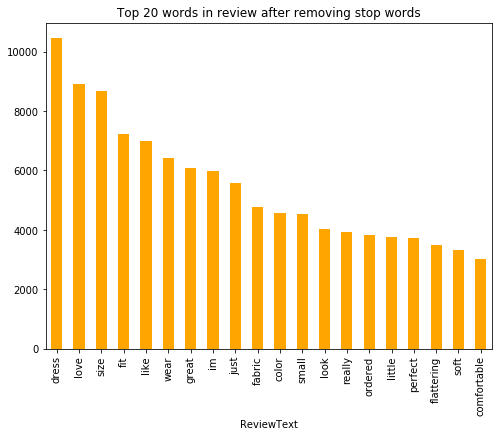

In [83]:
df= pd.DataFrame(words, columns = ['ReviewText' , 'count'])
df3=df.head(20)
df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='orange', title='Top 20 words in review after removing stop words',figsize=(8,6))

In [84]:
def top_words_bigrams(text):
    vector=CountVectorizer(ngram_range=(2,2))
    bag_of_words=vector.fit_transform(data['Review_Text'])
    sum_of_words= bag_of_words.sum(axis=0)
    frequency=[(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    frequency=sorted(frequency, key=lambda x: x[1], reverse=True)
    return frequency

words=top_words_bigrams(data["Review_Text"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

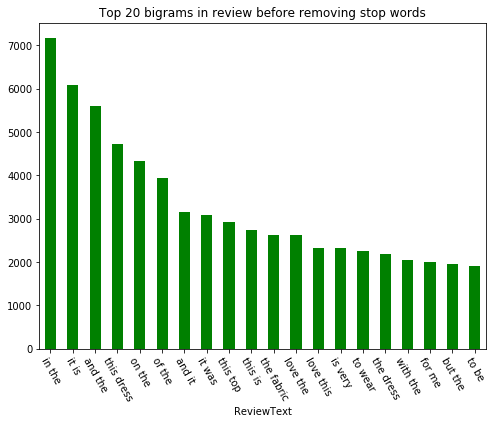

In [85]:
df= pd.DataFrame(words, columns = ['ReviewText' , 'count'])
df4=df.head(20)
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='green', title='Top 20 bigrams in review before removing stop words',figsize=(8,6))
plt.xticks(rotation=300)

In [86]:
def top_words_wo_bigrams(text):
    vector=CountVectorizer(ngram_range=(2,2),stop_words='english')
    bag_of_words=vector.fit_transform(data['Review_Text'])
    sum_of_words= bag_of_words.sum(axis=0)
    frequency=[(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    frequency=sorted(frequency, key=lambda x: x[1], reverse=True)
    return frequency

words=top_words_wo_bigrams(data["Review_Text"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

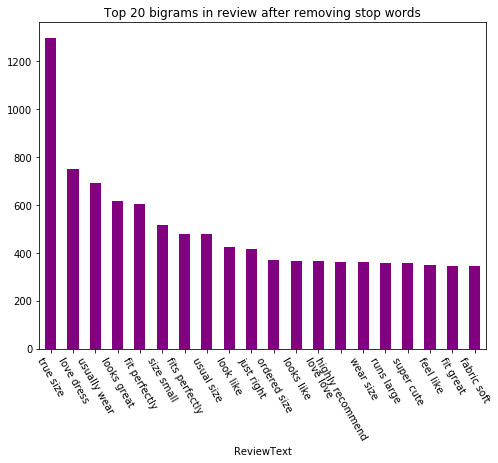

In [87]:
df= pd.DataFrame(words, columns = ['ReviewText' , 'count'])
df4=df.head(20)
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='purple', title='Top 20 bigrams in review after removing stop words',figsize=(8,6))
plt.xticks(rotation=300)

***Comparing Trigrams Before and after removing Stopwords***

In [88]:
def top_words_bigrams(text):
    vector=CountVectorizer(ngram_range=(3,3))
    bag_of_words=vector.fit_transform(data['Review_Text'])
    sum_of_words= bag_of_words.sum(axis=0)
    frequency=[(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    frequency=sorted(frequency, key=lambda x: x[1], reverse=True)
    return frequency

words=top_words_bigrams(data["Review_Text"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

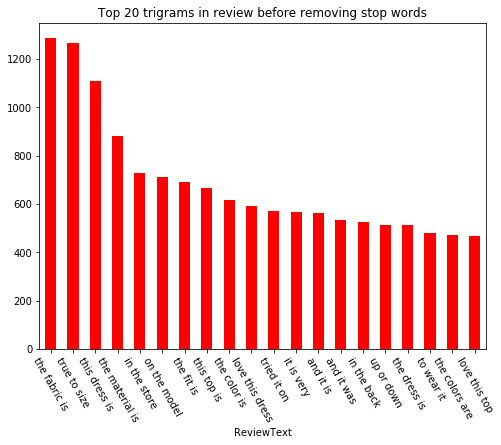

In [89]:
df= pd.DataFrame(words, columns = ['ReviewText' , 'count'])
df4=df.head(20)
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='red', title='Top 20 trigrams in review before removing stop words',figsize=(8,6))
plt.xticks(rotation=300)

In [90]:
def top_words_bigrams(text):
    vector=CountVectorizer(ngram_range=(3,3),stop_words='english')
    bag_of_words=vector.fit_transform(data['Review_Text'])
    sum_of_words= bag_of_words.sum(axis=0)
    frequency=[(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    frequency=sorted(frequency, key=lambda x: x[1], reverse=True)
    return frequency

words=top_words_bigrams(data["Review_Text"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

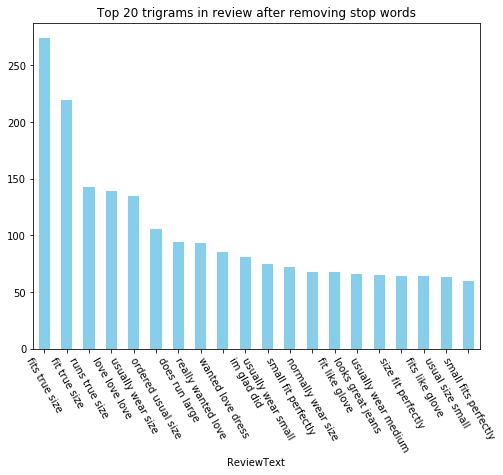

In [91]:
df= pd.DataFrame(words, columns = ['ReviewText' , 'count'])
df4=df.head(20)
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='skyblue', title='Top 20 trigrams in review after removing stop words',figsize=(8,6))
plt.xticks(rotation=300)

In [146]:
blob=TextBlob(str(data['Review_Text']))

In [147]:
pos_data=pd.DataFrame(blob.tags, columns=['Words','Tag'])

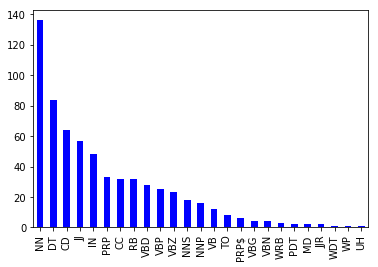

In [207]:
pos_data.Tag.value_counts().plot(kind='bar',color='blue')

In [209]:
data['Review_Text'].head().apply(lambda x: str(TextBlob(x).correct()))

0    Absolutely wonderful  silk and sex and comfort...
1    Love this dress  its soon pretty  i happened t...
2    I had such high hopes for this dress and reall...
3    I love love love this jumpsuit its fun flirt a...
4    His shirt is very flattering to all due to the...
Name: Review_Text, dtype: object

In [214]:
#Performing Stemming
from nltk.stem import PorterStemmer
st=PorterStemmer()
data['Review_Text'].head().apply(lambda x: " ".join(st.stem(word) for word in x.split(" ")))

0           absolut wonder  silki and sexi and comfort
1    love thi dress  it sooo pretti  i happen to fi...
2    I had such high hope for thi dress and realli ...
3    I love love love thi jumpsuit it fun flirti an...
4    thi shirt is veri flatter to all due to the ad...
Name: Review_Text, dtype: object

In [238]:
from nltk.stem import WordNetLemmatizer
lt=WordNetLemmatizer()
data['Review_Text'].head(10).apply(lambda x: " ".join(lt.lemmatize(x) for word in x.split(" ")))

0    Absolutely wonderful  silky and sexy and comfo...
1    Love this dress  its sooo pretty  i happened t...
2    I had such high hopes for this dress and reall...
3    I love love love this jumpsuit its fun flirty ...
4    This shirt is very flattering to all due to th...
5    I love tracy reese dresses but this one is not...
6    I aded this in my basket at hte last mintue to...
7    I ordered this in carbon for store pick up and...
8    I love this dress i usually get an xs but it r...
9    Im 55 and 125 lbs i ordered the s petite to ma...
Name: Review_Text, dtype: object

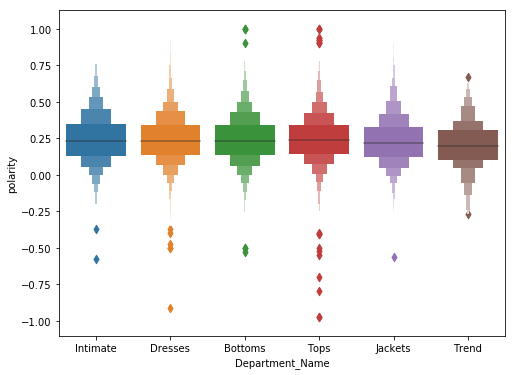

In [124]:
plt.figure(figsize=(8,6))
sns.boxenplot(x='Department_Name',y='polarity',data=data)
plt.show()

**The highest sentiment polarity score was achieved by all of the six departments except Trend department, and the lowest sentiment polarity score was collected by Tops department. And the Trend department has the lowest median polarity score. If you remember, the Trend department has the least number of reviews. This explains why it does not have as wide variety of score distribution as the other departments.**

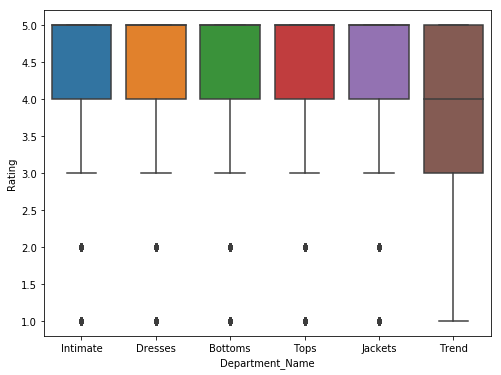

In [126]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Department_Name',y='Rating',data=data)
plt.show()

**Except Trend department, all the other departments’ median rating were 5. Overall, the ratings are high and sentiment are positive in this review data set**

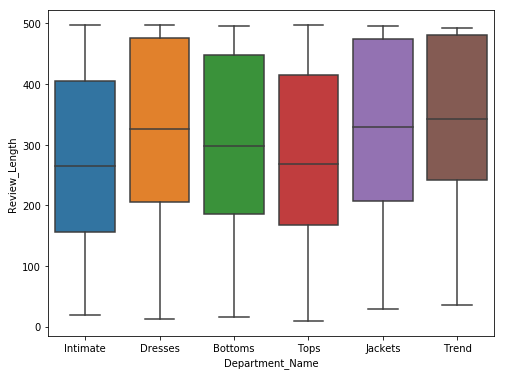

In [127]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Department_Name',y='Review_Length',data=data)
plt.show()

**The median review length of Tops & Intimate departments are relative lower than those of the other departments.**